In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../data/shots-2019-preprocessed.csv", index_col=0)
df

,game_id,year,month,day,winner,loser,y,x,play,time_remaining,...,distance,team,winner_score,loser_score,overtime,team_score,opp_score,time_remaining_game,x_adj,y_adj
0,201910220TOR,2019,10,22,Toronto,New Orleans,147,242,"1st quarter, 11:48.0 remaining<br>Lonzo Ball m...",11:48.0,...,11,New Orleans,0,0,0,0,0,2868.0,251.929847,163.416223
1,201910220TOR,2019,10,22,Toronto,New Orleans,27,240,"1st quarter, 11:47.0 remaining<br>Derrick Favo...",11:47.0,...,1,New Orleans,0,2,0,0,0,2867.0,249.929847,43.416223
2,201910220TOR,2019,10,22,Toronto,New Orleans,60,256,"1st quarter, 11:29.0 remaining<br>OG Anunoby m...",11:29.0,...,3,Toronto,0,2,0,0,2,2849.0,265.929847,76.416223
3,201910220TOR,2019,10,22,Toronto,New Orleans,32,320,"1st quarter, 11:16.0 remaining<br>Jrue Holiday...",11:16.0,...,8,New Orleans,0,2,0,2,0,2836.0,329.929847,48.416223
4,201910220TOR,2019,10,22,Toronto,New Orleans,208,418,"1st quarter, 11:11.0 remaining<br>Kyle Lowry m...",11:11.0,...,25,Toronto,0,2,0,0,2,2831.0,427.929847,224.416223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187619,202008010DEN,2020,8,1,Miami,Denver,52,255,"4th quarter, 0:57.0 remaining<br>Noah Vonleh m...",0:57.0,...,2,Denver,125,102,0,100,125,57.0,264.929847,68.416223
187620,202008010DEN,2020,8,1,Miami,Denver,57,213,"4th quarter, 0:31.0 remaining<br>PJ Dozier mis...",0:31.0,...,4,Denver,125,102,0,102,125,31.0,222.929847,73.416223
187621,202008010DEN,2020,8,1,Miami,Denver,27,240,"4th quarter, 0:28.0 remaining<br>Bol Bol misse...",0:28.0,...,1,Denver,125,102,0,102,125,28.0,249.929847,43.416223
187622,202008010DEN,2020,8,1,Miami,Denver,44,212,"4th quarter, 0:24.0 remaining<br>PJ Dozier mis...",0:24.0,...,3,Denver,125,102,0,102,125,24.0,221.929847,60.416223


In [4]:
game_df = df[["game_id", "winner", "loser"]].drop_duplicates()
game_df.head()

,game_id,winner,loser
0,201910220TOR,Toronto,New Orleans
203,201910220LAC,LA Clippers,LA Lakers
369,201910300WAS,Houston,Washington
563,201910300UTA,Utah,LA Clippers
724,201910300TOR,Toronto,Detroit


In [5]:
win_df = game_df.groupby("winner")["game_id"].count().reset_index().rename({"winner": "team", "game_id":"games_won"}, axis=1)
win_df.head()

,team,games_won
0,Atlanta,20
1,Boston,48
2,Brooklyn,35
3,Charlotte,23
4,Chicago,22


In [6]:
lose_df = game_df.groupby("loser")["game_id"].count().reset_index().rename({"loser": "team", "game_id":"games_lost"}, axis=1)
lose_df.head()

,team,games_lost
0,Atlanta,47
1,Boston,24
2,Brooklyn,37
3,Charlotte,42
4,Chicago,43


In [7]:
summary_df = win_df.merge(lose_df, on="team", how="inner")
summary_df["win_rate"] = summary_df["games_won"] / (summary_df["games_won"] + summary_df["games_lost"])
summary_df = summary_df.sort_values(by="win_rate")
summary_df

,team,games_won,games_lost,win_rate
9,Golden State,15,50,0.230769
5,Cleveland,19,46,0.292308
17,Minnesota,19,45,0.296875
0,Atlanta,20,47,0.298507
8,Detroit,20,46,0.303030
19,New York,21,45,0.318182
4,Chicago,22,43,0.338462
29,Washington,25,47,0.347222
3,Charlotte,23,42,0.353846
18,New Orleans,30,42,0.416667


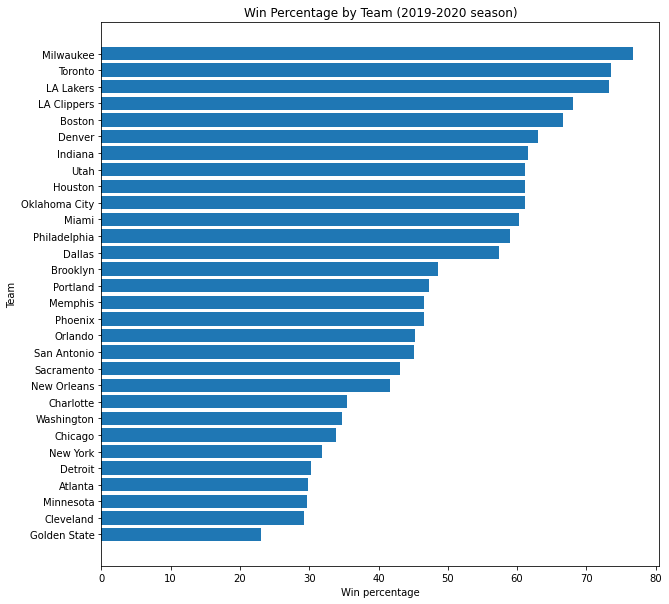

In [8]:
fig = plt.figure(figsize=(10,10))
plt.barh(summary_df["team"], summary_df["win_rate"] * 100)
plt.xlabel("Win percentage")
plt.ylabel("Team")
plt.title("Win Percentage by Team (2019-2020 season)")
plt.show()

In [8]:
shots = df.groupby("team")["game_id"].count().reset_index().rename({"game_id": "shots_taken"}, axis=1)
shots = shots.sort_values("shots_taken")
shots

,team,shots_taken
3,Charlotte,5570
8,Detroit,5643
5,Cleveland,5705
9,Golden State,5714
4,Chicago,5749
17,Minnesota,5853
19,New York,5889
0,Atlanta,6050
28,Utah,6105
20,Oklahoma City,6132


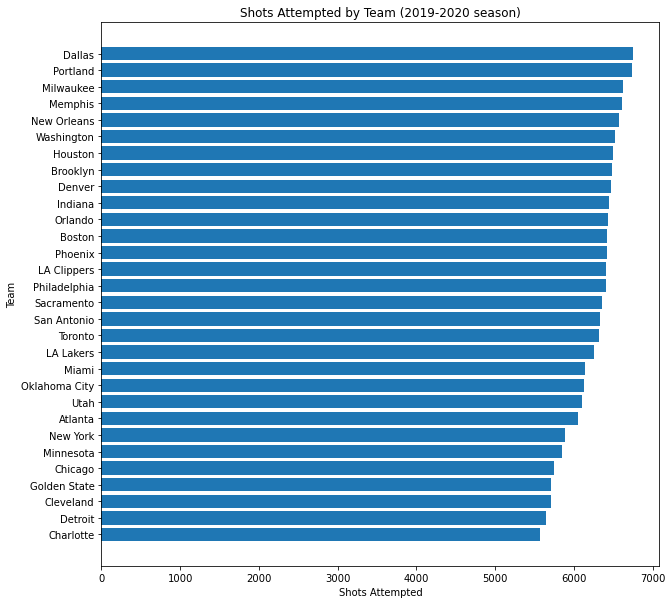

In [9]:
fig = plt.figure(figsize=(10,10))
plt.barh(shots["team"], shots["shots_taken"])
plt.xlabel("Shots Attempted")
plt.ylabel("Team")
plt.title("Shots Attempted by Team (2019-2020 season)")
plt.show()

In [25]:
shots = df.groupby(["team", "attempt"])["game_id"].count().reset_index().rename({"game_id": "shots_taken"}, axis=1)
shots = shots.sort_values(["attempt", "shots_taken"], ascending=False)
shots

,team,attempt,shots_taken
21,Houston,3-pointer,3248
13,Dallas,3-pointer,3074
33,Milwaukee,3-pointer,2829
5,Brooklyn,3-pointer,2730
55,Toronto,3-pointer,2648
37,New Orleans,3-pointer,2634
31,Miami,3-pointer,2560
35,Minnesota,3-pointer,2528
57,Utah,3-pointer,2512
49,Portland,3-pointer,2509


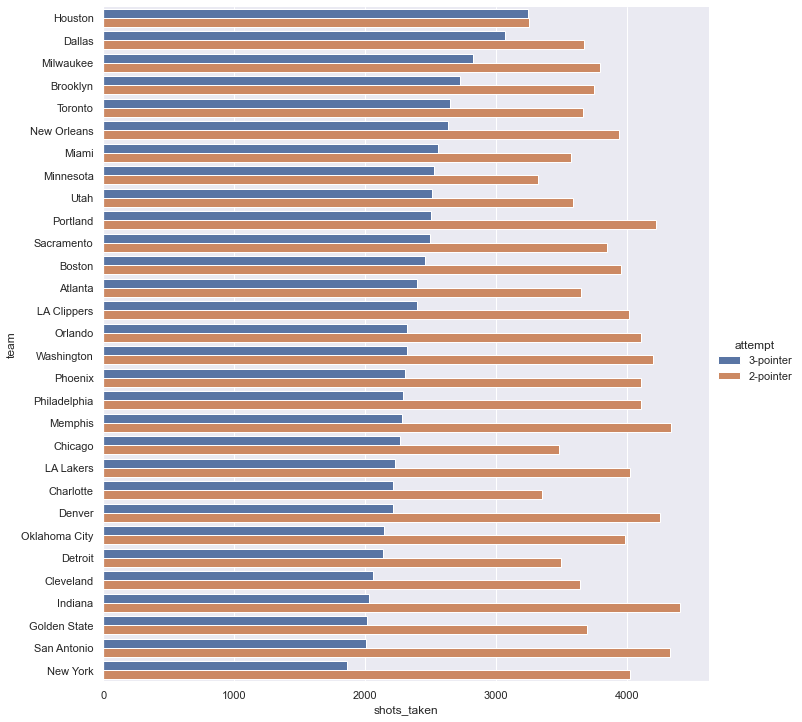

In [26]:
# sns.set_theme(rc={'figure.figsize':(20,16)})
sns.catplot(y = "team", x = "shots_taken", hue="attempt", data=shots, kind="bar", height=10)
plt.show()